**Global Education Dropout Risk Analysis**

Using World Bank–Derived Education Indicators

1️⃣ Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


This project uses standard Python data analysis and machine learning libraries.
The focus is on interpretability and policy-relevant insights rather than complex modeling.

2️⃣ Load Dataset

In [ ]:
df = pd.read_csv("https://github.com/ashish-rai-ml/global-education-data-analysis/blob/main/worldbank_education_clean.csv")
df.head()


The dataset is derived from World Bank education indicators and contains country–year level observations for key education metrics related to access, completion, and system capacity.

In [ ]:
3️⃣ Dataset Overview

In [ ]:
df.info()


In [ ]:
df.describe()


Each row represents a country in a given year.
The dataset includes completion rates, out-of-school children percentage, pupil–teacher ratio, and education expenditure as a percentage of GDP.

In [ ]:
4️⃣ Define Dropout Risk (Target Variable)

In [ ]:
df["Dropout_Risk"] = (df["Out_of_School_Children_Percent"] >= 10).astype(int)


In [6]:
df[["Country", "Year", "Out_of_School_Children_Percent", "Dropout_Risk"]]


,Country,Year,Out_of_School_Children_Percent,Dropout_Risk
0,India,2015,8.2,0
1,India,2018,6.4,0
2,India,2021,4.9,0
3,Kenya,2015,16.8,1
4,Kenya,2020,13.5,1
5,Brazil,2016,5.1,0
6,Brazil,2021,3.9,0


Direct dropout labels are not available in global education datasets.
Therefore, dropout risk is inferred using the percentage of out-of-school children.

Countries with 10% or more out-of-school children are classified as high dropout risk, reflecting a significant education access challenge

5️⃣ Target Distribution Check

In [ ]:
df["Dropout_Risk"].value_counts()


6️⃣ Feature Selection

In [8]:
features = [
    "Primary_Completion_Rate",
    "Lower_Secondary_Completion_Rate",
    "Pupil_Teacher_Ratio",
    "Education_Expenditure_GDP"
]

X = df[features]
y = df["Dropout_Risk"]


Features were selected based on their relevance to education access and system quality.
The target variable is excluded from the feature set to avoid data leakage.

7️⃣ Train–Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


The dataset is split into training and testing sets using stratification to preserve the dropout risk distribution.

8️⃣ Baseline Model — Logistic Regression

In [11]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Logistic Regression is used as a baseline model due to its simplicity and interpretability.
It provides a reference point against which more complex models can be evaluated.

9️⃣ Tree-Based Model — Random Forest

In [12]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Random Forest is used to capture non-linear relationships and interactions between education indicators.
Class weighting is applied to account for potential imbalance in dropout risk cases.

🔟 Confusion Matrix (Random Forest)

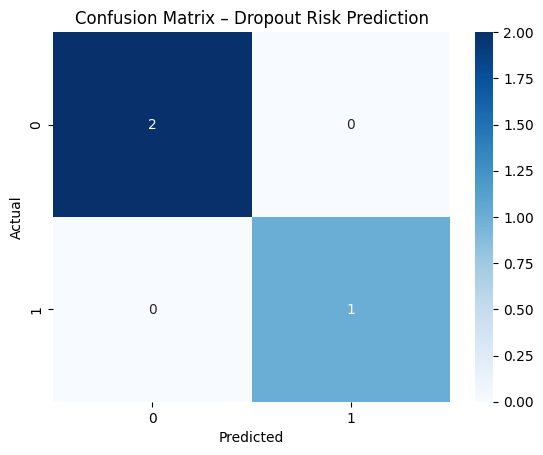

In [13]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Dropout Risk Prediction")
plt.show()


The confusion matrix highlights how well the model identifies high-risk education systems.
In social-sector applications, recall for high-risk cases is often prioritized over overall accuracy.

1️⃣1️⃣ Feature Importance Analysis

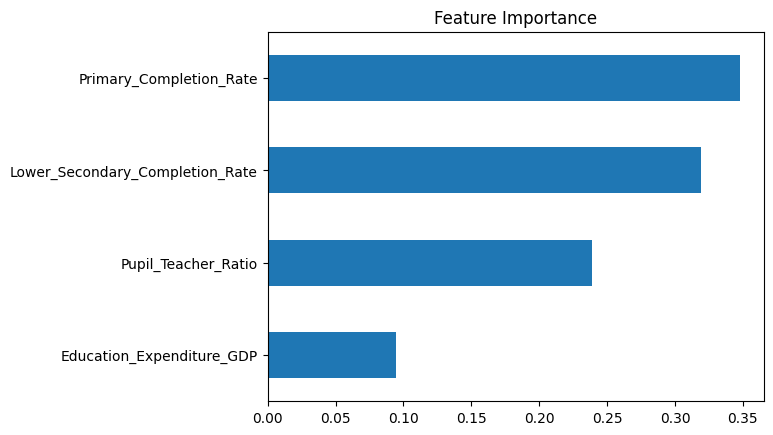

In [14]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=features
).sort_values()

importances.plot(kind="barh", title="Feature Importance")
plt.show()


1️⃣2️⃣ Key Insights

## Key Insights

- Higher pupil–teacher ratios are associated with increased dropout risk.
- Lower secondary completion rates are strong indicators of education system stress.
- Education expenditure shows a protective effect against dropout risk.
- Completion rates provide stronger signals than enrollment alone.


1️⃣3️⃣ Policy & Program Implications

## Policy Implications

- Education systems with high pupil–teacher ratios may require targeted staffing interventions.
- Improving secondary completion rates should be prioritized to reduce long-term dropout risk.
- Sustained investment in education expenditure can support retention and access.


1️⃣4️⃣ Conclusion

## Conclusion

This project demonstrates how global education indicators can be used to identify
dropout risk at the system level. By combining domain understanding with machine
learning, the analysis provides interpretable insights that can support
evidence-based education policy and program design.
